# Labos en R

*Tous les labos, version R. (Pas de labo 1.)*

---

## Labo 2

### Help

In [ ]:
# help()
# help(function)
# help(package='package-name)

### Packages

In [ ]:
# install
# install.packages('package-name')

# already installed with conda
#install.packages("foreign")

# new installs
#install.packages("Rcmdr", dependencies = TRUE, repos="http://cran.rstudio.com/") # in conda?
#install.packages("nortest", repos="http://cran.rstudio.com/")
#install.packages("sas7bdat", repos="http://cran.rstudio.com/")
#install.packages("Hmisc", repos="http://cran.rstudio.com/")
#install.packages("pastecs", repos="http://cran.rstudio.com/")
# import
# library('package-name')

library(foreign)
library(nortest)
library(sas7bdat)
library(Hmisc)
library(pastecs)

### Working space

In [ ]:
ls()
# rm(list=ls())
# setwd()
getwd()

### Read data

In [ ]:
# import excel : via txt tab separated
#fichierTexte <- read.table("data/labo2/SR_Data.txt", header = TRUE)

# import DBF (DBase)
fichierDBF <- read.dbf("data/labo2/SR_Data.dbf")

# import SPSS
#fichierSPSS <- read.spss("data/labo2/Data_SPSS.sav", to.data.frame=TRUE)

# import SAS
#fichierSAS <- read.sas7bdat("data/labo2/tableau1.sas7bdat", debug=FALSE)

head(fichierDBF)

### Table structure

In [ ]:
# show variable names
names(fichierDBF)
# indexes start at 1

# delete variable
fichierDBF$Shape_Leng <- NULL

# rename variable
names(fichierDBF)[1] <- "POPTOT"

# create variable
fichierDBF$km <- fichierDBF$Shape_Area / 1000000
fichierDBF$HabKm2 <- fichierDBF$POPTOT / fichierDBF$km

head(fichierDBF)

In [ ]:
 # new table from a subset
names(fichierDBF)
ZScores <-fichierDBF[,c(12:15)]
names(ZScores)

### Normality

In [ ]:
#install.packages("moments", repos="http://cran.rstudio.com/")
library(moments)

#### Skewness

In [ ]:
skewness(fichierDBF)

#### Kurtosis

In [ ]:
kurtosis(fichierDBF)

#### Kolmogorov-Smirnov

In [ ]:
#lillie.test(Tableau1$HabKm2)
# sapply(fichierDBF[18:20],lillie.test)
sapply(fichierDBF[18],lillie.test)

In [ ]:
#ks.test(x, y) # two sample

#m <- mean(fichierDBF[18])
#s <- sd(fichierDBF[18])

#ks.test(fichierDBF[18], "pnorm", m, s) 

#### Shapiro-Wilk

In [ ]:
sapply(fichierDBF[18],shapiro.test)  # sapply(fichierDBF[18:20],shapiro.test)

### Transformations

#### Square root

In [ ]:
fichierDBF$SqrtDens <- sqrt(fichierDBF$HabKm2)
fichierDBF$SqrtImg <- sqrt(fichierDBF$IMMREC_PCT)

#### Logarithmic

In [ ]:
# log(0) = error
fichierDBF$LogDens <- log(fichierDBF$HabKm2)
fichierDBF$LogImg <- log(fichierDBF$IMMREC_PCT+1)

summary(fichierDBF)

#### Centrage et réduction

In [ ]:
ZScores$INDICE_PAU <- scale(fichierDBF[1], center = TRUE, scale = TRUE)
ZScores$Dist_Min <- scale(fichierDBF[2], center = TRUE, scale = TRUE)
ZScores$N_1000 <- scale(fichierDBF[3], center = TRUE, scale = TRUE)
ZScores$Dist_Moy_3 <- scale(fichierDBF[4], center = TRUE, scale = TRUE)

#help(sapply)
sapply(ZScores,mean)
sapply(ZScores,sd)

### Descriptive statistics

In [ ]:
summary(fichierDBF)

In [ ]:
sapply(fichierDBF, mean)
sapply(fichierDBF, sd)
sapply(fichierDBF, min)
sapply(fichierDBF, max)
sapply(fichierDBF, median)
sapply(fichierDBF, range)
sapply(fichierDBF, quantile)

In [ ]:
# Hmisc.describe
describe(fichierDBF)

In [ ]:
# pastecs.stat.desc
stat.desc(fichierDBF, basic=TRUE, norm=TRUE)

### Histograms

In [ ]:
hist(fichierDBF$HabKm2, main="Histogramme", xlab="Habitants au km2", ylab="Effectif", breaks=10, col='lightblue')

In [ ]:
hist(fichierDBF$SqrtDens, main="Histogramme", xlab="Habitants au km2 (racine)", ylab="Effectif", breaks=10, col='gold')

In [ ]:
hist(fichierDBF$LogDens, main="Histogramme", xlab="Habitants au km2 log)", ylab="Effectif", breaks=10, col='coral')

#### Histogram with normal curve

In [ ]:
x <- fichierDBF$HabKm2
h<-hist(x, breaks=10, col="lightblue", xlab="Habitants au km2", ylab="Effectif", 
main="Histogramme avec courbe normale")
xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)

In [ ]:
x <- fichierDBF$SqrtDens
h<-hist(x, breaks=10, col="red", xlab="Habitants au km2 (racine)", ylab = "Effectif",
main="Histogramme avec courbe normale")
xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)

---

## Labo 3

### Graphiques

* [couleurs](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf)
* [graphiques de base](http://www.ats.ucla.edu/stat/r/gbe/default.htm)
* [graphiques avancés](http://www.statmethods.net/graphs/creating.html)

In [ ]:
# install
#install.packages('doBy', repos="http://cran.rstudio.com/")
#install.packages('gmodels', repos="http://cran.rstudio.com/")
#install.packages('scatterplot3d', repos="http://cran.rstudio.com/")

# import
library(foreign)
library(nortest)
library(sas7bdat)
library(Hmisc)
library(pastecs)
library(ggplot2)
library(doBy)
library(gmodels)
library(scatterplot3d)

# data
Tableau1 <- read.sas7bdat("data/labo3/tableau1.sas7bdat", debug=FALSE)
names(Tableau1)

TableauKhi2 <- read.sas7bdat("data/labo3/khi2.sas7bdat", debug=FALSE)
names(TableauKhi2)

#### Histogrammes classiques

In [ ]:
hist(Tableau1$IMMREC_PCT, breaks=10, xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 

breaks = nombre de barres

In [ ]:
hist(Tableau1$IMMREC_PCT, breaks=20, xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 

density = pour rendu barres (ex.: hachures)

In [ ]:
hist(Tableau1$IMMREC_PCT, density=20, breaks=20, xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 

col = colours

In [ ]:
hist(Tableau1$IMMREC_PCT, breaks=20, col="red", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 
hist(Tableau1$IMMREC_PCT, breaks=20, col="lightyellow", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 
hist(Tableau1$IMMREC_PCT, breaks=20, col="lightsalmon", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 
hist(Tableau1$IMMREC_PCT, breaks=20, col="lightgreen", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 

ylim = limites

In [ ]:
plot(
    hist(Tableau1$IMMREC_PCT, breaks=20),
    ylim=c(0, 80), col="lightgreen", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme"
) 

prob : proportion vs effectif

In [ ]:
hist(Tableau1$IMMREC_PCT, col="lightgray", breaks=20, xlab="Immigrants récents (%)", ylab = "Proportion", main="Histogramme", prob=TRUE)

#### Histogrammes avec courbe normale

y = proportion

In [ ]:
m <- mean(Tableau1$IMMREC_PCT)
std <- sd(Tableau1$IMMREC_PCT)
hist(Tableau1$IMMREC_PCT, col="lightyellow", breaks=20, prob=TRUE, xlab="Immigrants récents (%)", ylab = "Proportion", main="Histogramme avec la courbe normale")
curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE)

y = effectif

In [ ]:
x <- Tableau1$IMMREC_PCT
h<-hist(x, breaks=20, col="lightyellow", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme avec la courbe normale") 
xfit<-seq(min(x),max(x),length=40) 
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x)) 
yfit <- yfit*diff(h$mids[1:2])*length(x) 
lines(xfit, yfit, col="darkblue", lwd=2)

#### Nuages de points

In [ ]:
plot(Tableau1$IMMREC_PCT, Tableau1$FAIBREVPCT, xlab="Immigrants récents (%)", ylab = "Faible revenu (%)", main="Nuage de points")

#### Nuages de points avec droite de régression

In [ ]:
plot(Tableau1$IMMREC_PCT, Tableau1$FAIBREVPCT, xlab="Immigrants récents (%)", ylab = "Faible revenu (%)", main="Nuage de points avec droite de régression")
abline(lsfit(Tableau1$IMMREC_PCT, Tableau1$FAIBREVPCT))

#### Matrice de nuage de points

In [ ]:
pairs(~MONOPCT+MENAGE1PCT+TX_CHOM+FAIBREVPCT,data=Tableau1, 
      main="Matrice de nuages de points")

#### Nuages de point 3D

In [ ]:
scatterplot3d(Tableau1$MONOPCT, Tableau1$TX_CHOM, Tableau1$FAIBREVPCT, main="Nuage de points 3D")
scatterplot3d(Tableau1$MONOPCT, Tableau1$TX_CHOM, Tableau1$FAIBREVPCT, main="Nuage de points 3D", xlab="Familles monoparentales (%)", ylab="Taux de chômage", zlab="Faible revenu (%)");

### Matrice de corrélation

#### Pearson

In [ ]:
rcorr(cbind(Tableau1$MONOPCT,Tableau1$MENAGE1PCT,Tableau1$TX_CHOM,Tableau1$FAIBREVPCT,Tableau1$Dist_Min,Tableau1$N_1000), type="pearson")

#### Spearman

In [ ]:
rcorr(cbind(Tableau1$MONOPCT,Tableau1$MENAGE1PCT,Tableau1$TX_CHOM,Tableau1$FAIBREVPCT,Tableau1$Dist_Min,Tableau1$N_1000), type="spearman")

### Régression linéaire simple

In [ ]:
reg <- lm(TX_CHOM ~ FAIBREVPCT, data = Tableau1)
summary(reg)

names(Tableau1)

### Tableau de contingence

In [ ]:
names(TableauKhi2)

#### Modalités variables nominales

In [ ]:
# sex
table(TableauKhi2$SEX)
TableauKhi2$SEX <- factor(TableauKhi2$SEX, levels = c(1,2), labels = c("Homme", "Femme"))
table(TableauKhi2$SEX)

# transport mode
table(TableauKhi2$Mode)
TableauKhi2$Mode <- factor(TableauKhi2$Mode, levels = c(0:4), labels = c("Auto (conducteur)", "Auto (passager)", "Transport en commun", "Tranport actif", "Autres"))
table(TableauKhi2$Mode)

# distance
table(TableauKhi2$DIST)
TableauKhi2$DIST <- factor(TableauKhi2$DIST, levels = c(1:7), labels = c("Moins de 5 km", "5 à 9,9 km","10 à 14,9 km", "15 à 19,9 km", "20 à 24,9 km", "25 à 29,9 km", "30 km et plus"))
table(TableauKhi2$DIST)

#### Tableau de contingence

In [ ]:
CrossTable(TableauKhi2$SEX, TableauKhi2$Mode, chisq=TRUE, expected=TRUE, resid=TRUE, format="SPSS")
CrossTable(TableauKhi2$SEX, TableauKhi2$DIST, chisq=TRUE, expected=TRUE, resid=TRUE, format="SPSS")
CrossTable(TableauKhi2$Mode, TableauKhi2$DIST, chisq=TRUE, expected=TRUE, resid=TRUE, format="SPSS")

---

## Labo 4

In [ ]:
# import
library(foreign)
library(nortest)
library(sas7bdat)
library(doBy)

# data
MTL <- read.sas7bdat("data/labo4/mtl_ttest.sas7bdat", debug=FALSE)
TOR <- read.sas7bdat("data/labo4/tor_ttest.sas7bdat", debug=FALSE)
VAN <- read.sas7bdat("data/labo4/van_ttest.sas7bdat", debug=FALSE)
TROISRMR <- read.sas7bdat("data/labo4/troisrmr_anova.sas7bdat", debug=FALSE)
names(MTL)
names(TOR)
names(VAN)
names(TROISRMR)

In [ ]:
# modalités (labels)
table(MTL$SEX)
table(TOR$SEX)
table(VAN$SEX)
MTL$SEX <- factor(MTL$SEX, levels = c(1,2), labels = c("Homme", "Femme"))
TOR$SEX <- factor(TOR$SEX, levels = c(1,2), labels = c("Homme", "Femme"))
VAN$SEX <- factor(VAN$SEX, levels = c(1,2), labels = c("Homme", "Femme"))
table(MTL$SEX)
table(TOR$SEX)
table(VAN$SEX)

TROISRMR$CMA <- factor(TROISRMR$CMA, levels = c(462,535,933), labels = c("Montréal", "Toronto", "Vancouver"))
table(TROISRMR$CMA)

### T-Test : Comparaison de moyennes

#### Test F

Vérification de l'égalité des variances

In [ ]:
var.test(TOTINC ~ SEX, alternative='two.sided', conf.level=.95, data=MTL)

Interprétation
* **p-value < 2.2e-16**
    * p < 0.05 alors méthode Satterthwaite
* **true ratio of variances is not equal to 1**

#### Méthode Satterthwaite

Pas égales : P < 0,05
* `var.equal=FALSE`

In [ ]:
t.test(TOTINC~SEX, alternative='two.sided', conf.level=.95, var.equal=FALSE, data=MTL)

Interprétation
* **t = -27.088**
* **p-value < 2.2e-16**

#### Méthode Pooled

Égales : P >= 0,05
* `var.equal=TRUE`

In [ ]:
t.test(TOTINC~SEX, alternative='two.sided', conf.level=.95, var.equal=TRUE, data=MTL)
boxplot(TOTINC~SEX, data = MTL, col = "coral", main="Boites à moustache (RMR de Montréal)", xlab="Sexe", ylab="Revenu total")
boxplot(LogTotInc~SEX, data = MTL, col = "coral", main="Boites à moustache (RMR de Montréal)", xlab="Sexe", ylab="Revenu total (log)")

Interprétation
* **t = -27.783**
* **p-value < 2.2e-16**

### Analyse des résultats

Contexte dataset, valeurs et comparaison des 2 moyennes des 2 modes de la variable qualitative, "la différence entre les moyennes (x) est d'ailleurs significative (t=27,09; P<0,001)".

### ANOVA : Analyse de variance

Moyenne par groupe

In [ ]:
# doBy
summaryBy(GROSRT ~ CMA, TROISRMR, FUN=c(mean), na.rm=TRUE)

#### Boxplot

Visualisation d'ANOVA

In [ ]:
boxplot(GROSRT ~ CMA, data = TROISRMR, col = "lightyellow", main="Boites à moustache", xlab="Région métropolitaine", ylab="Loyer ($)")  #Analyse de variance : test F

#### ANOVA

In [ ]:
anova.aov <- aov(GROSRT ~ CMA, data = TROISRMR)
summary(anova.aov)

Interprétation
* **CMA Sum Sq** = variance expliquée (inter)
* **Residuals Sum Sq** = variance non expliquée (intra)
* **CMA Df** = nombre de degrés de liberté pour variance expliquée (inter)
* **Residuals Df** = nombre de degrés de liberté pour variance non expliquée (intra)
* **CMA F value** = F observé
* **CMA Pr(>F)** = Valeur de P rattachée à valeur de F

#### Test de F

Hypothèse H0 = "indépendance entre les deux variances (inter et intra)"

* k = nombre de groupes
* n = nombre d'observations

* DL numérateur (VE, inter) de table de Fisher
    * k - 1
* DL dénominateur (VNE, intra) de table de Fisher
    * n - k

Calcul F théorique
* F théorique
* P associé au F théorique, seuils de signification
    * 95% : p=0,05
    * 99% : p=0,01
    * 99,9% : p=0,001

In [ ]:
f_theorique <- qf(0.99, 2, 8379)
f_theorique
# qt() pour table Student t pour coefficient de ... 
# (voir autres cours)

Interprétation
* F observé > à F théorique
    * moyennes sont statistiquement différentes
    * H0 rejeté
* F observé < F théorique
    * moyennes des groupes ne sont pas différentes
    * H0 validée

#### Calcul R carré

Pour obtenir Coefficient de détermination

In [ ]:
anova.r2 <- lm(GROSRT ~ CMA, data = TROISRMR)
summary(anova.r2)

Interprétation
* **Multiple R-squared** = Coefficient de détermination
    * la variable qualitative explique à x% la variation de la vaiable quantitative

#### Test de Tukey

Comparaison des moyennes groupes, 2 à 2

In [ ]:
TukeyHSD(anova.aov)

---

## Labo 5

In [ ]:
# install
#install.packages("MASS", repos="http://cran.rstudio.com/")      ## Tests de normalité supp.
#install.packages("car", repos="http://cran.rstudio.com/")      ## Companion to Applied Regression

In [4]:
# import
library(foreign)
library(MASS)
library(sas7bdat)
library(pastecs)
library(car)

# data
MTL <- read.sas7bdat("data/labo5/pauvretemtl.sas7bdat", debug=FALSE)
names(MTL)

[1] "srnom"       "FAIBREVPCT"  "SqrtChom"    "MONOPCT"     "menage1per" 
[6] "SqrtImmig"   "pasecol1524" "tpspartiel"

In [5]:
# stats univariees
summary(MTL)

     srnom       FAIBREVPCT        SqrtChom        MONOPCT     
 0001.00:  1   Min.   : 1.232   Min.   :0.000   Min.   : 0.00  
 0002.00:  1   1st Qu.:19.761   1st Qu.:2.568   1st Qu.:16.05  
 0003.00:  1   Median :28.699   Median :2.925   Median :21.23  
 0004.00:  1   Mean   :29.982   Mean   :2.995   Mean   :21.38  
 0005.00:  1   3rd Qu.:39.803   3rd Qu.:3.416   3rd Qu.:26.18  
 0006.00:  1   Max.   :82.642   Max.   :6.887   Max.   :51.28  
 (Other):500                                                   
   menage1per       SqrtImmig      pasecol1524      tpspartiel   
 Min.   : 3.943   Min.   :0.000   Min.   : 0.00   Min.   :30.65  
 1st Qu.:28.587   1st Qu.:1.454   1st Qu.:24.51   1st Qu.:41.26  
 Median :38.598   Median :1.961   Median :32.66   Median :45.47  
 Mean   :37.674   Mean   :2.074   Mean   :32.66   Mean   :45.61  
 3rd Qu.:46.752   3rd Qu.:2.543   3rd Qu.:40.93   3rd Qu.:49.65  
 Max.   :72.632   Max.   :5.078   Max.   :68.75   Max.   :69.79  
                          

In [11]:
# regression lineaire multiple
ols <- lm(
    FAIBREVPCT ~ 
    SqrtChom + 
    MONOPCT + 
    menage1per + 
    SqrtImmig + 
    pasecol1524 + 
    tpspartiel, 
    data=MTL)
summary(ols)


Call:
lm(formula = FAIBREVPCT ~ SqrtChom + MONOPCT + menage1per + SqrtImmig + 
    pasecol1524 + tpspartiel, data = MTL)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.405  -4.290  -0.586   3.498  34.343 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.10961    2.20183 -16.400  < 2e-16 ***
SqrtChom      7.97771    0.57049  13.984  < 2e-16 ***
MONOPCT       0.60825    0.04703  12.933  < 2e-16 ***
menage1per    0.20132    0.02517   7.997 8.94e-15 ***
SqrtImmig     2.58049    0.37394   6.901 1.57e-11 ***
pasecol1524   0.10986    0.02818   3.899  0.00011 ***
tpspartiel    0.27767    0.05336   5.204 2.86e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.326 on 499 degrees of freedom
Multiple R-squared:  0.8059,	Adjusted R-squared:  0.8035 
F-statistic: 345.2 on 6 and 499 DF,  p-value: < 2.2e-16


In [10]:
## coefficients standardisés
CoefStand <- lm(
    scale(FAIBREVPCT) ~ 
    scale(SqrtChom) + 
    scale(MONOPCT) + 
    scale(menage1per) + 
    scale(SqrtImmig) + 
    scale(pasecol1524) + 
    scale(tpspartiel), 
    data = MTL
)
summary(CoefStand)


Call:
lm(formula = scale(FAIBREVPCT) ~ scale(SqrtChom) + scale(MONOPCT) + 
    scale(menage1per) + scale(SqrtImmig) + scale(pasecol1524) + 
    scale(tpspartiel), data = MTL)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.42971 -0.30057 -0.04107  0.24509  2.40635 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.646e-16  1.971e-02   0.000  1.00000    
scale(SqrtChom)     3.899e-01  2.788e-02  13.984  < 2e-16 ***
scale(MONOPCT)      3.343e-01  2.585e-02  12.933  < 2e-16 ***
scale(menage1per)   1.825e-01  2.282e-02   7.997 8.94e-15 ***
scale(SqrtImmig)    1.714e-01  2.484e-02   6.901 1.57e-11 ***
scale(pasecol1524)  9.386e-02  2.407e-02   3.899  0.00011 ***
scale(tpspartiel)   1.268e-01  2.436e-02   5.204 2.86e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4433 on 499 degrees of freedom
Multiple R-squared:  0.8059,	Adjusted R-squared:  0.8035 
F-statistic: 345.2 on 6 a

In [12]:
## multicolinéarité?
### Valeurs de VIF
vif(ols)
vif(ols) > 5 # problème de multicolinéarité (VIF > 5)?


SqrtChom     MONOPCT  menage1per   SqrtImmig pasecol1524  tpspartiel 
   1.997672    1.716917    1.338880    1.585428    1.489206    1.525380

SqrtChom     MONOPCT  menage1per   SqrtImmig pasecol1524  tpspartiel 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE

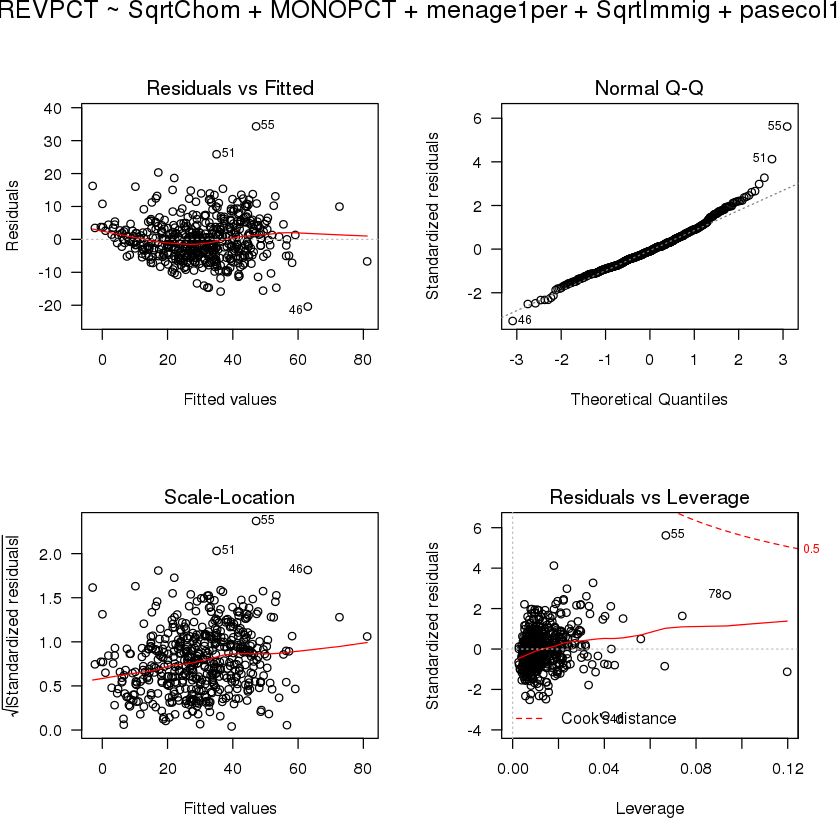

In [13]:
## Graphiques et distance de cook
opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
plot(ols, las = 1)
par(opar)

nbr.val      nbr.null        nbr.na           min           max 
 5.060000e+02  0.000000e+00  0.000000e+00 -2.040480e+01  3.434334e+01 
        range           sum        median          mean       SE.mean 
 5.474814e+01 -7.402412e-14 -5.862049e-01 -1.468305e-16  2.795597e-01 
 CI.mean.0.95           var       std.dev      coef.var      skewness 
 5.492434e-01  3.954575e+01  6.288541e+00 -4.282856e+16  6.760335e-01 
     skew.2SE      kurtosis      kurt.2SE    normtest.W    normtest.p 
 3.113292e+00  2.133433e+00  4.922041e+00  9.729368e-01  4.697304e-08

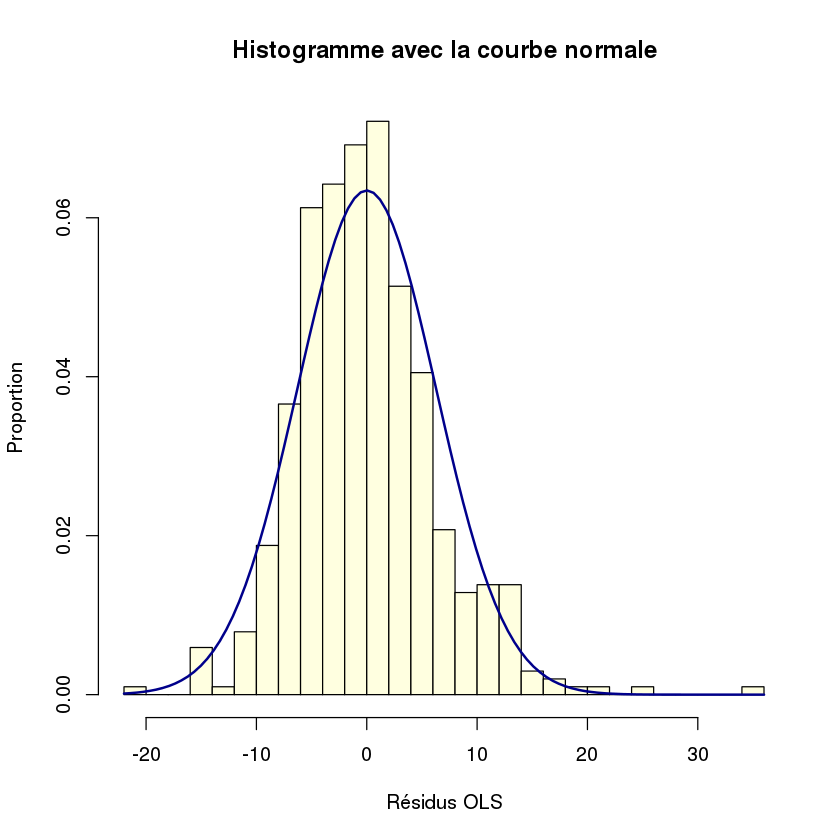

In [14]:
## Histogramme sur les résidus et vérification de la normalité des résidus
m <- mean(residuals(ols))
std <- sd(residuals(ols))
hist(residuals(ols), col="lightyellow", breaks=20, prob=TRUE, xlab="Résidus OLS", ylab = "Proportion", main="Histogramme avec la courbe normale")
curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE)
stat.desc(residuals(ols), basic=TRUE, norm=TRUE)

In [16]:
# Repérer les valeurs aberrantes : Distance de Cook > 4 / n ou 8 / n
nobs <- NROW(na.omit(residuals(ols)))            # Nombre d'observations dans le jeu de données
cook <- cooks.distance(ols)                      # Distance de Cook
ypredit <- fitted.values(ols)                    # Y prédits par le modèle
res <- residuals(ols)                            # résidus (Y - Y prédits par le modèle)
res_std <- rstandard(ols)                        # résidus standardisés

a <- cbind(MTL, cook, ypredit, res, res_std)
a <- a[order(-cook), ]
a[cook > 4/nobs, ]    # Observations dont la distance de Cook > 4 / n
a[cook > 8/nobs, ]    # Observations dont la distance de Cook > 8 / n 

,srnom,FAIBREVPCT,SqrtChom,MONOPCT,menage1per,SqrtImmig,pasecol1524,tpspartiel,cook,ypredit,res,res_std
21,0021.00,62.77603,4.053217,39.70588,45.04792,1.369306,52.63158,49.62963,0.006716149,52.54256,10.23347,1.631841
71,0073.00,55.39906,3.67194,25,55.08475,1.928971,58.82353,50,0.006426216,44.80397,10.59509,1.687955
114,0114.00,24.43325,3.635362,16.32653,37.07865,3.58418,16.94915,53.42466,0.005897266,36.23329,-11.80005,-1.876161
135,0133.00,45.43689,2.983635,14.94253,56.81818,2.944575,27.86885,51.52439,0.005863305,33.18773,12.24916,1.946705
373,0395.01,58.20896,3.708991,38.46154,42.0354,1.552301,44.0678,47.25275,0.005672756,47.30444,10.90451,1.735029
473,0601.02,33.96226,4.051199,24.84848,36,3.681114,14,45.74899,0.004762004,42.31183,-8.349568,-1.33217
484,0605.01,28.87324,2.43975,15.85366,34.4,1.453505,26.66667,35.31746,0.004694459,16.40964,12.4636,1.978397
494,0610.06,40.14337,3.132303,27.81457,21.86047,1.466471,37.3494,38.22394,0.004607817,28.69945,11.44392,1.81777
105,0106.00,17.71429,1.591115,28.125,42.37288,2.320008,43.47826,39.31624,0.004509052,23.90192,-6.187635,-0.9936036
20,0019.00,54.01302,3.445598,33.98058,49.38272,1.137147,53.62319,47.47475,0.004492352,43.99694,10.01608,1.593039


,srnom,FAIBREVPCT,SqrtChom,MONOPCT,menage1per,SqrtImmig,pasecol1524,tpspartiel,cook,ypredit,res,res_std
21,0021.00,62.77603,4.053217,39.70588,45.04792,1.369306,52.63158,49.62963,0.006716149,52.54256,10.23347,1.631841
71,0073.00,55.39906,3.67194,25,55.08475,1.928971,58.82353,50,0.006426216,44.80397,10.59509,1.687955
114,0114.00,24.43325,3.635362,16.32653,37.07865,3.58418,16.94915,53.42466,0.005897266,36.23329,-11.80005,-1.876161
373,0395.01,58.20896,3.708991,38.46154,42.0354,1.552301,44.0678,47.25275,0.005672756,47.30444,10.90451,1.735029
484,0605.01,28.87324,2.43975,15.85366,34.4,1.453505,26.66667,35.31746,0.004694459,16.40964,12.4636,1.978397
105,0106.00,17.71429,1.591115,28.125,42.37288,2.320008,43.47826,39.31624,0.004509052,23.90192,-6.187635,-0.9936036
20,0019.00,54.01302,3.445598,33.98058,49.38272,1.137147,53.62319,47.47475,0.004492352,43.99694,10.01608,1.593039
165,0164.00,27.43902,3.558617,8.695652,57.5,3.157497,30.43478,51.75439,0.004426104,35.0076,-7.568571,-1.208992
367,0385.00,16.31944,2.522625,13.04348,61.34021,1.950956,15.38462,47.2,0.004403388,24.1289,-7.80946,-1.246638
143,0141.00,17.95666,2.761036,21.79487,46.28571,2.360668,34.48276,51.33929,0.004330848,32.62783,-14.67118,-2.325591


In [17]:
# Tableau de données sans les valeurs aberrantes (Cook > 8 / n )
dataSansOutliers <- a[a$cook  < 8/nobs, ]
dataSansOutliers$cook <- NULL
dataSansOutliers$ypredit <- NULL
dataSansOutliers$res <- NULL
dataSansOutliers$res_std <- NULL
head(dataSansOutliers)

,srnom,FAIBREVPCT,SqrtChom,MONOPCT,menage1per,SqrtImmig,pasecol1524,tpspartiel
59,0061.00,30.95238,3.216338,36.84211,53.84615,1.856953,15.38462,45.90164
52,0053.00,55.03356,3.576408,13.04348,68.57143,3.172206,48.27586,59.74026
83,0085.00,44.28571,2.995723,32.35294,29.82456,1.43839,37.93103,32.25806
151,0150.00,33.69565,4.082483,26.04167,53.06859,2.464498,56.25,49.52077
42,0043.00,42.85714,3.867897,11.76471,62.10526,1.301889,17.3913,50.80645
50,0051.00,44.61538,2.773501,16.27907,57.92683,2.438843,19.60784,62.43094



Call:
lm(formula = FAIBREVPCT ~ SqrtChom + MONOPCT + menage1per + SqrtImmig + 
    pasecol1524 + tpspartiel, data = dataSansOutliers)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4311  -3.7694  -0.2836   3.3556  14.3676 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -38.07012    1.98689 -19.161  < 2e-16 ***
SqrtChom      8.62818    0.56045  15.395  < 2e-16 ***
MONOPCT       0.62153    0.04414  14.082  < 2e-16 ***
menage1per    0.13012    0.02321   5.605 3.52e-08 ***
SqrtImmig     2.37947    0.34582   6.881 1.87e-11 ***
pasecol1524   0.13829    0.02593   5.333 1.49e-07 ***
tpspartiel    0.30772    0.04772   6.448 2.77e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.404 on 480 degrees of freedom
Multiple R-squared:  0.842,	Adjusted R-squared:  0.8401 
F-statistic: 426.5 on 6 and 480 DF,  p-value: < 2.2e-16


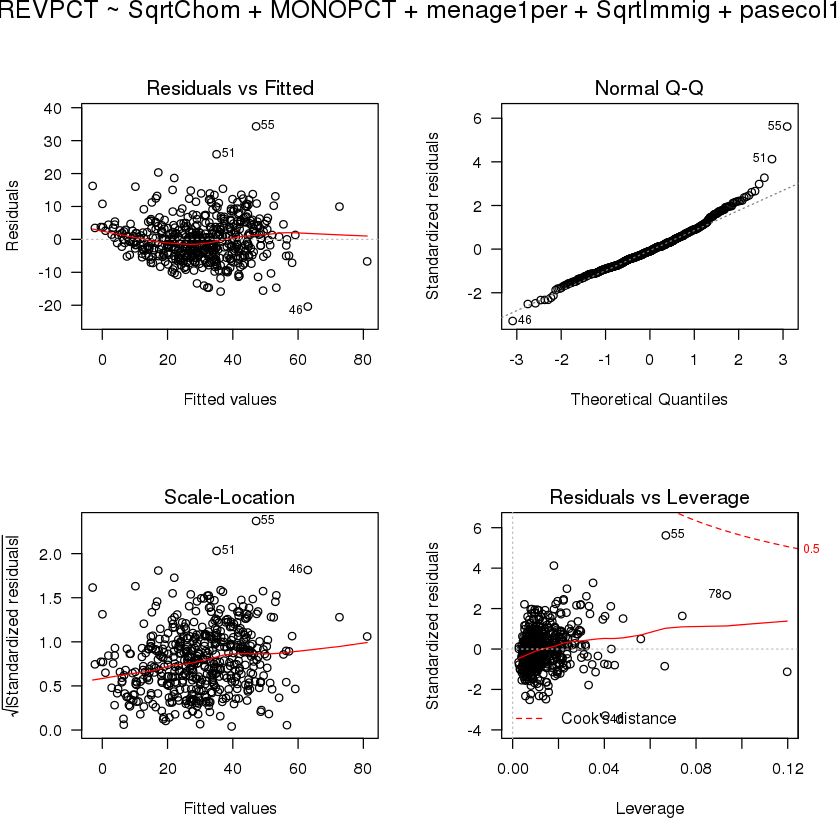

In [18]:
# Nouveau modèle de régression sans les valeurs aberrantes
ols2 <- lm(FAIBREVPCT ~ SqrtChom+MONOPCT+menage1per+SqrtImmig+pasecol1524+tpspartiel, data = dataSansOutliers)
summary(ols2)
opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
plot(ols, las = 1)
par(opar)

In [19]:
# Comparaison des deux modèles : coefficients
summary(ols)
summary(ols2)


Call:
lm(formula = FAIBREVPCT ~ SqrtChom + MONOPCT + menage1per + SqrtImmig + 
    pasecol1524 + tpspartiel, data = MTL)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.405  -4.290  -0.586   3.498  34.343 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.10961    2.20183 -16.400  < 2e-16 ***
SqrtChom      7.97771    0.57049  13.984  < 2e-16 ***
MONOPCT       0.60825    0.04703  12.933  < 2e-16 ***
menage1per    0.20132    0.02517   7.997 8.94e-15 ***
SqrtImmig     2.58049    0.37394   6.901 1.57e-11 ***
pasecol1524   0.10986    0.02818   3.899  0.00011 ***
tpspartiel    0.27767    0.05336   5.204 2.86e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.326 on 499 degrees of freedom
Multiple R-squared:  0.8059,	Adjusted R-squared:  0.8035 
F-statistic: 345.2 on 6 and 499 DF,  p-value: < 2.2e-16



Call:
lm(formula = FAIBREVPCT ~ SqrtChom + MONOPCT + menage1per + SqrtImmig + 
    pasecol1524 + tpspartiel, data = dataSansOutliers)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4311  -3.7694  -0.2836   3.3556  14.3676 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -38.07012    1.98689 -19.161  < 2e-16 ***
SqrtChom      8.62818    0.56045  15.395  < 2e-16 ***
MONOPCT       0.62153    0.04414  14.082  < 2e-16 ***
menage1per    0.13012    0.02321   5.605 3.52e-08 ***
SqrtImmig     2.37947    0.34582   6.881 1.87e-11 ***
pasecol1524   0.13829    0.02593   5.333 1.49e-07 ***
tpspartiel    0.30772    0.04772   6.448 2.77e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.404 on 480 degrees of freedom
Multiple R-squared:  0.842,	Adjusted R-squared:  0.8401 
F-statistic: 426.5 on 6 and 480 DF,  p-value: < 2.2e-16


In [20]:
# Comparaison des deux modèles 
vif(ols)
vif(ols2)

SqrtChom     MONOPCT  menage1per   SqrtImmig pasecol1524  tpspartiel 
   1.997672    1.716917    1.338880    1.585428    1.489206    1.525380

SqrtChom     MONOPCT  menage1per   SqrtImmig pasecol1524  tpspartiel 
   2.140924    1.766574    1.439367    1.707210    1.620847    1.525679

nbr.val      nbr.null        nbr.na           min           max 
 5.060000e+02  0.000000e+00  0.000000e+00 -2.040480e+01  3.434334e+01 
        range           sum        median          mean       SE.mean 
 5.474814e+01 -7.402412e-14 -5.862049e-01 -1.468305e-16  2.795597e-01 
 CI.mean.0.95           var       std.dev      coef.var      skewness 
 5.492434e-01  3.954575e+01  6.288541e+00 -4.282856e+16  6.760335e-01 
     skew.2SE      kurtosis      kurt.2SE    normtest.W    normtest.p 
 3.113292e+00  2.133433e+00  4.922041e+00  9.729368e-01  4.697304e-08

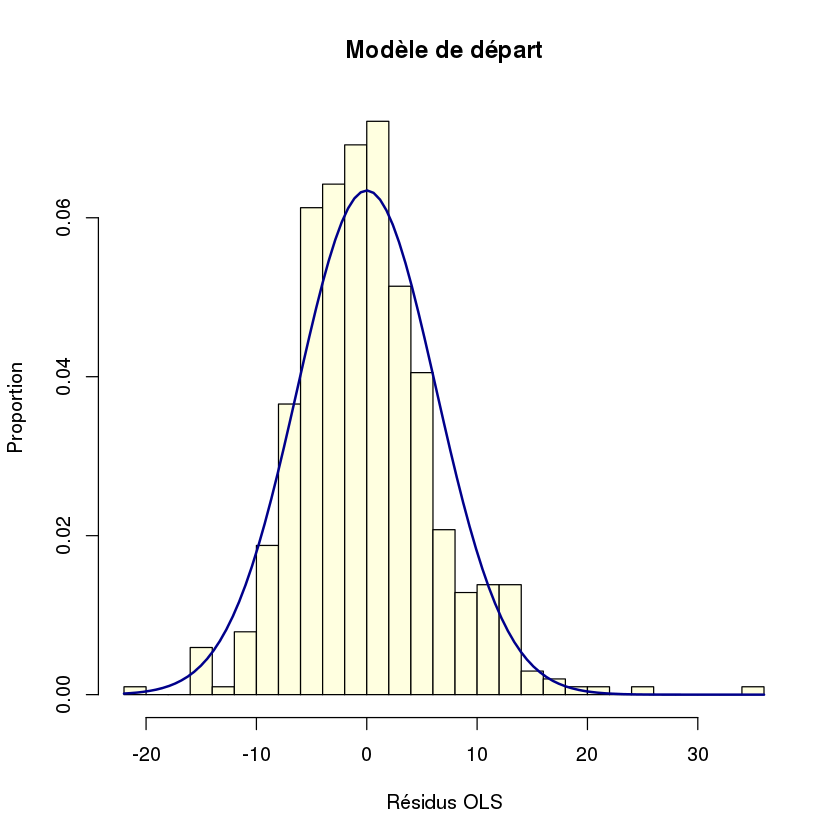

nbr.val      nbr.null        nbr.na           min           max 
 4.870000e+02  0.000000e+00  0.000000e+00 -1.543105e+01  1.436764e+01 
        range           sum        median          mean       SE.mean 
 2.979869e+01  2.592371e-14 -2.836211e-01  5.314951e-17  2.433441e-01 
 CI.mean.0.95           var       std.dev      coef.var      skewness 
 4.781365e-01  2.883837e+01  5.370137e+00  1.010383e+17  1.659919e-01 
     skew.2SE      kurtosis      kurt.2SE    normtest.W    normtest.p 
 7.500282e-01  9.711185e-02  2.198417e-01  9.942507e-01  6.341600e-02

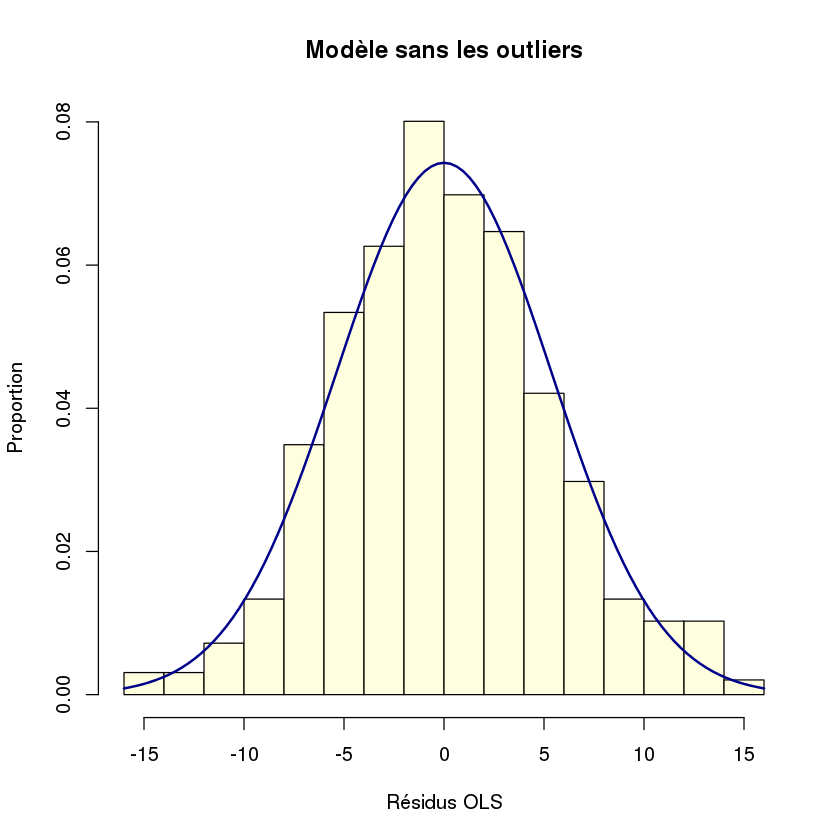

In [21]:
# Comparaison des deux histogrammes
m <- mean(residuals(ols))
std <- sd(residuals(ols))
hist(residuals(ols), col="lightyellow", breaks=20, prob=TRUE, xlab="Résidus OLS", ylab = "Proportion", main="Modèle de départ")
curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE)
stat.desc(residuals(ols), basic=TRUE, norm=TRUE)

m <- mean(residuals(ols2))
std <- sd(residuals(ols2))
hist(residuals(ols2), col="lightyellow", breaks=20, prob=TRUE, xlab="Résidus OLS", ylab = "Proportion", main="Modèle sans les outliers")
curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE)
stat.desc(residuals(ols2), basic=TRUE, norm=TRUE)

In [22]:
# Comparaison de la normalité
stat.desc(residuals(ols), basic=TRUE, norm=TRUE)
stat.desc(residuals(ols2), basic=TRUE, norm=TRUE)

nbr.val      nbr.null        nbr.na           min           max 
 5.060000e+02  0.000000e+00  0.000000e+00 -2.040480e+01  3.434334e+01 
        range           sum        median          mean       SE.mean 
 5.474814e+01 -7.402412e-14 -5.862049e-01 -1.468305e-16  2.795597e-01 
 CI.mean.0.95           var       std.dev      coef.var      skewness 
 5.492434e-01  3.954575e+01  6.288541e+00 -4.282856e+16  6.760335e-01 
     skew.2SE      kurtosis      kurt.2SE    normtest.W    normtest.p 
 3.113292e+00  2.133433e+00  4.922041e+00  9.729368e-01  4.697304e-08

nbr.val      nbr.null        nbr.na           min           max 
 4.870000e+02  0.000000e+00  0.000000e+00 -1.543105e+01  1.436764e+01 
        range           sum        median          mean       SE.mean 
 2.979869e+01  2.592371e-14 -2.836211e-01  5.314951e-17  2.433441e-01 
 CI.mean.0.95           var       std.dev      coef.var      skewness 
 4.781365e-01  2.883837e+01  5.370137e+00  1.010383e+17  1.659919e-01 
     skew.2SE      kurtosis      kurt.2SE    normtest.W    normtest.p 
 7.500282e-01  9.711185e-02  2.198417e-01  9.942507e-01  6.341600e-02

---

## Labo 6

### Fichiers IVT de StatsCan

.IVT = fichiers Beyond 20/20

Beyond = software, permet 
* lecture data Stats Can
* tableaux croisés de plus de 2 dimensions
* méta-données sur variables

Export vers Excel
1. sélectionner les lignes pertinentes
2. right+clic + montrer
    * ex.: Pour pourcentage de 0 à 14 ans, et 65 ans et + : prendre lignes, prendre total
3. drag étiquette de colonne (ex.: Géographie) vers panneua des lignes
4. refaire 1. et 2.
    * ex.: Montréal = 462

In [23]:
# import
library(foreign)
library(MASS)
library(pastecs)
library(car)
library(gmodels)
library(sas7bdat)

# data
RMR <- read.sas7bdat("data/labo6/rmrmtl06.sas7bdat", debug=FALSE)
names(RMR)

[1] "SRIDU"      "FRPCT_ApIm" "Pop65PCT"   "TxChom"     "MonoPct"   
 [6] "Menage1"    "ImmigRec"   "MinorVisib" "EmplAtypiq" "AucuneDipl"
[11] "BacEtPlus"  "ILE_MTL"    "Zones"      "DistCBD_KM" "SqrtTxChom"

In [24]:
# stats univariees
summary(RMR)

     SRIDU       FRPCT_ApIm       Pop65PCT          TxChom      
 0001.00:  1   Min.   : 1.00   Min.   : 2.620   Min.   : 0.000  
 0002.00:  1   1st Qu.: 7.50   1st Qu.: 9.037   1st Qu.: 4.700  
 0003.00:  1   Median :15.65   Median :12.605   Median : 6.500  
 0004.00:  1   Mean   :17.95   Mean   :13.763   Mean   : 7.342  
 0005.00:  1   3rd Qu.:25.45   3rd Qu.:17.185   3rd Qu.: 9.300  
 0006.00:  1   Max.   :85.40   Max.   :56.570   Max.   :29.100  
 (Other):854                                                    
    MonoPct         Menage1         ImmigRec        MinorVisib   
 Min.   : 0.00   Min.   : 6.25   Min.   : 0.000   Min.   : 0.00  
 1st Qu.:13.71   1st Qu.:19.83   1st Qu.: 1.188   1st Qu.: 5.07  
 Median :18.32   Median :31.33   Median : 3.345   Median :13.12  
 Mean   :19.00   Mean   :31.90   Mean   : 4.830   Mean   :16.80  
 3rd Qu.:23.39   3rd Qu.:43.66   3rd Qu.: 6.692   3rd Qu.:23.23  
 Max.   :50.00   Max.   :75.00   Max.   :28.850   Max.   :84.78  
                  

In [25]:
# variables muettes
# Zones = 1 alors Montréal
# Zones = 2 alors Laval
# Zones = 3 alors Couronne Nord
# Zones = 4 alors Couronne Sud

RMR$Montreal     <- ifelse(RMR$Zones == 1, 1, 0)
RMR$Laval        <- ifelse(RMR$Zones == 2, 1, 0)
RMR$CouronneNord <- ifelse(RMR$Zones == 3, 1, 0)
RMR$CouronneSud  <- ifelse(RMR$Zones == 4, 1, 0)

In [26]:
## verification
CrossTable(RMR$Zones, RMR$Montreal)
CrossTable(RMR$Zones, RMR$Laval)
CrossTable(RMR$Zones, RMR$CouronneNord)
CrossTable(RMR$Zones, RMR$CouronneSud)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  860 

 
             | RMR$Montreal 
   RMR$Zones |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |         0 |       506 |       506 | 
             |   208.284 |   145.716 |           | 
             |     0.000 |     1.000 |     0.588 | 
             |     0.000 |     1.000 |           | 
             |     0.000 |     0.588 |           | 
-------------|-----------|-----------|-----------|
           2 |        73 |         0 |        73 | 
             |    61.393 |    42.951 |           | 
             |     1.000 |     0.000 |     0.085 | 
             |     0.206 |     0.000 |           | 
             |     0.085 |     0.000 |           | 
-------------|-----------|-----------|--

In [27]:
# variables d'interaction muettes
RMR$Pop65PCT_Dist <- RMR$Pop65PCT * RMR$DistCBD_KM
RMR$Menag1_Dist   <- RMR$Menage1 * RMR$DistCBD_KM

In [ ]:


## modele 1 : sans variable muette ni d'interaction

Modele1 <- lm(
    FRPCT_ApIm ~ 
    SqrtTxChom + 
    MonoPct + 
    Menage1 + 
    MinorVisib + 
    EmplAtypiq + 
    AucuneDipl + 
    Pop65PCT, 
    data=RMR
)

### modele 1 without outliers
cook <- cooks.distance(Modele1)   # Distance de Cook
DataSansOutliers <- cbind(RMR, cook) # Fusion des deux tableaux
DataSansOutliers <- DataSansOutliers[DataSansOutliers$cook  < 8/nobs, ]

Modele1_Final <- lm(
    FRPCT_ApIm ~ 
    SqrtTxChom + 
    MonoPct + 
    Menage1 + 
    MinorVisib + 
    EmplAtypiq + 
    AucuneDipl + 
    Pop65PCT, 
    data=DataSansOutliers
)
summary(Modele1_Final)

# multicolinéarité?
vif(Modele1_Final)
vif(Modele1_Final) > 5

In [ ]:
## modele 2 : variable muette Ile de Montréal

Modele2 <- lm(
    FRPCT_ApIm ~ 
    SqrtTxChom + 
    MonoPct + 
    Menage1 + 
    MinorVisib + 
    EmplAtypiq + 
    AucuneDipl + 
    Pop65PCT + 
    Montreal, 
    data=RMR
)

### modele 2 without outliers
cook <- cooks.distance(Modele2)   # Distance de Cook
DataSansOutliers <- cbind(RMR, cook) # Fusion des deux tableaux
DataSansOutliers <- DataSansOutliers[DataSansOutliers$cook  < 8/nobs, ]
Modele2_Final <- lm(FRPCT_ApIm ~ SqrtTxChom+MonoPct+Menage1+MinorVisib+EmplAtypiq+AucuneDipl+Pop65PCT+Montreal, data = DataSansOutliers)
summary(Modele2_Final)

### multicolinéarité?
vif(Modele2_Final)
vif(Modele2_Final) > 5

In [ ]:
## modele 3 : variable muette Zones (sauf Montréal, en référence)

Modele3 <- lm(
    FRPCT_ApIm ~ 
    SqrtTxChom + 
    MonoPct + 
    Menage1 + 
    MinorVisib + 
    EmplAtypiq + 
    AucuneDipl + 
    Pop65PCT + 
    Laval + 
    CouronneNord + 
    CouronneSud, 
    data=RMR
)

### modele 3 without outliers
cook <- cooks.distance(Modele3)   # Distance de Cook
DataSansOutliers <- cbind(RMR, cook) # Fusion des deux tableaux
DataSansOutliers <- DataSansOutliers[DataSansOutliers$cook  < 8/nobs, ]
Modele3_Final <- lm(FRPCT_ApIm ~ SqrtTxChom+MonoPct+Menage1+MinorVisib+EmplAtypiq+AucuneDipl+Pop65PCT+Laval+CouronneNord+CouronneSud, data = DataSansOutliers)
summary(Modele3_Final)

### multicolinéarité?
vif(Modele3_Final)
vif(Modele3_Final) > 5

In [ ]:
## modele 4 : modele 3 + variable de distance + variable d'interaction

Modele4 <- lm(
    FRPCT_ApIm ~ 
    SqrtTxChom + 
    MonoPct + 
    Menage1 + 
    MinorVisib + 
    EmplAtypiq + 
    AucuneDipl + 
    Pop65PCT + 
    Laval + 
    CouronneNord + 
    CouronneSud + 
    DistCBD_KM + 
    Menag1_Dist, 
    data=RMR
)

### modele 4 without outliers
cook <- cooks.distance(Modele4)   # Distance de Cook
DataSansOutliers <- cbind(RMR, cook) # Fusion des deux tableaux
DataSansOutliers <- DataSansOutliers[DataSansOutliers$cook  < 8/nobs, ]
Modele4_Final <- lm(FRPCT_ApIm ~ SqrtTxChom+MonoPct+Menage1+MinorVisib+EmplAtypiq+AucuneDipl+Pop65PCT+Laval+CouronneNord+CouronneSud+DistCBD_KM+Menag1_Dist, data = DataSansOutliers)
summary(Modele4_Final)

### multicolinéarité?
vif(Modele4_Final)
vif(Modele4_Final) > 5